<ipython-input-4-dd8869ac993a>:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Sig_genes.csv")


KNN Accuracy: 1.0
SVM Accuracy: 0.9862570735650767

KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       320

    accuracy                           1.00      1237
   macro avg       1.00      1.00      1.00      1237
weighted avg       1.00      1.00      1.00      1237


SVM Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       917
           1       1.00      0.95      0.97       320

    accuracy                           0.99      1237
   macro avg       0.99      0.97      0.98      1237
weighted avg       0.99      0.99      0.99      1237



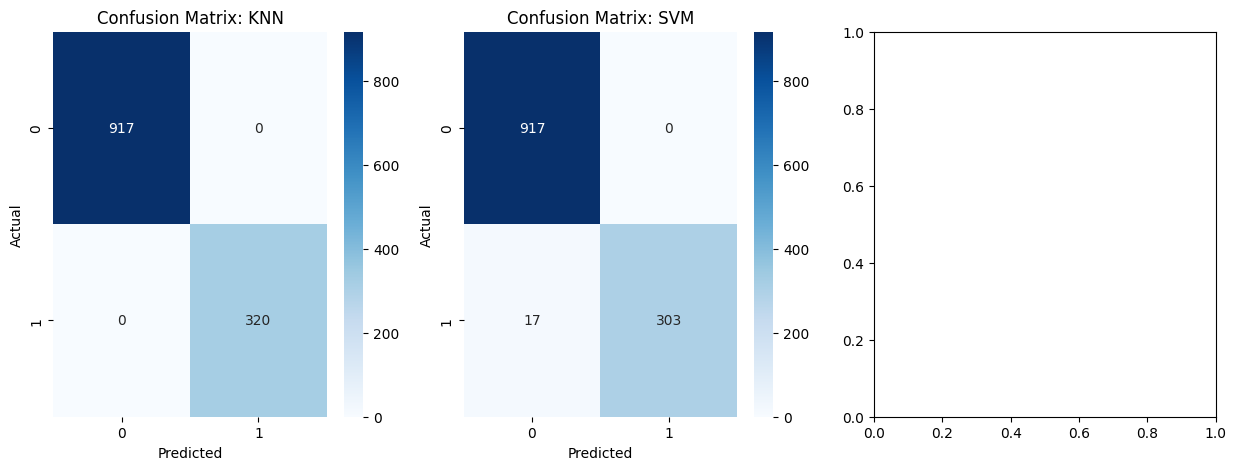

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load DESeq2 result CSV file
df = pd.read_csv("/content/Sig_genes.csv")

# **Instead of dropping all rows with missing values, consider imputing them**
# **For example, you can replace missing values with the mean or median of the column:**
# df['log2FC'].fillna(df['log2FC'].mean(), inplace=True)

# **Alternatively, if the missing values are not crucial, you can drop only the rows**
# **where 'log2FC' is missing, as it's used for both X and y:**
df = df.dropna(subset=['log2FoldChange'])

# Define independent (X) and dependent (y) variables
X = df[['log2FoldChange']]  # Features
y = (df['log2FoldChange'] >1).astype(int)  # Binary target (1 = significant, 0 = not significant)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


### 3. Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Model Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Classification Reports
print("\nKNN Report:\n", classification_report(y_test, y_pred_knn))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, y_pred, title in zip(axes, [y_pred_knn, y_pred_svm], ["KNN", "SVM"]):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix: {title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()
